# Web Scraping Stock Data

In [1]:
#import the basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
pd.set_option('display.max_columns', 500)

In [2]:
#allow to use own functions from functions.py
import os
os.getcwd()

'C:\\Users\\Stijn\\Documents\\GitHub\\stock-scraping'

In [3]:
ticker = "ASML.AS"

In [4]:
###TO DO:
#put graphs on 100 for chosen date
#calculate ratios

In [5]:
#summary
url_summary = "https://finance.yahoo.com/quote/"+ ticker + "?p=" + ticker + "&.tsrc=fin-srch"
url_summary

'https://finance.yahoo.com/quote/ASML.AS?p=ASML.AS&.tsrc=fin-srch'

In [6]:
#analysis by analysts
url_analists = "https://finance.yahoo.com/quote/" + ticker + "/analysis?p=" + ticker

In [7]:
#sustainability
url_sust = "https://finance.yahoo.com/quote/" + ticker + "/sustainability?p=" + ticker

## Financials

In [8]:
from functions import income_statement

In [9]:
help(income_statement)

Help on function income_statement in module functions:

income_statement(ticker, type='balance-sheet')
    Webscrape financial data from Yahoo! Finance.
    
    Parameters
    ----------
    ticker : str
        Ticker of the company you want to consult.
    type : str
        Type of financial information you would like.
        -Options for type: financials, balance-sheet & cash-flow. Default is balance-sheet.
    
    Returns
    -------
    pandas DataFrame
    
    Caution
    --------
    Numbers are in thousands.



In [10]:
fin_abi = income_statement('ABI.BR', 'balance-sheet')
fin_abi

Breakdown,Total Assets,Total Liabilities Net Minority Interest,Total Equity Gross Minority Interest,Total Capitalization,Common Stock Equity,Capital Lease Obligations,Net Tangible Assets,Working Capital,Invested Capital,Tangible Book Value,Total Debt,Net Debt,Share Issued,Ordinary Shares Number,Treasury Shares Number
12/31/2018,232103000,160199000,71904000,169908000,64486000,204000,-113656000,-16178000,174196000,-113656000,109914000,102636000,2019000,1956500,62500
12/31/2019,236648000,152095000,84553000,171594000,75722000,2025000,-94844000,-6027000,176738000,-94844000,103041000,93778000,2019242,1959379,59863
12/31/2020,226410000,148059000,78351000,161666000,68024000,2234000,-94474000,-5833000,164355000,-94474000,98565000,81080000,2019242,1972249,46993
12/31/2021,217627000,138287000,79340000,154208000,68669000,2277000,-87557000,-10235000,155222000,-87557000,88830000,74456000,1775336,1737136,38200


In [11]:
types = ['financials', 'balance-sheet', 'cash-flow']
df_fin = pd.DataFrame()

for typ in types:
    df = income_statement("ABI.BR", typ)
    df_fin = pd.concat([df_fin, df], axis=1)

In [12]:
df_fin

Breakdown,Total Revenue,Cost of Revenue,Gross Profit,Operating Expense,Operating Income,Net Non Operating Interest Income Expense,Other Income Expense,Pretax Income,Tax Provision,Net Income Common Stockholders,Diluted NI Available to Com Stockholders,Basic EPS,Diluted EPS,Basic Average Shares,Diluted Average Shares,Total Operating Income as Reported,Total Expenses,Net Income from Continuing & Discontinued Operation,Normalized Income,Interest Income,Interest Expense,Net Interest Income,EBIT,EBITDA,Reconciled Cost of Revenue,Reconciled Depreciation,Net Income from Continuing Operation Net Minority Interest,Total Unusual Items Excluding Goodwill,Total Unusual Items,Normalized EBITDA,Tax Rate for Calcs,Tax Effect of Unusual Items,Total Assets,Total Liabilities Net Minority Interest,Total Equity Gross Minority Interest,Total Capitalization,Common Stock Equity,Capital Lease Obligations,Net Tangible Assets,Working Capital,Invested Capital,Tangible Book Value,Total Debt,Net Debt,Share Issued,Ordinary Shares Number,Treasury Shares Number,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow,Cash Flow from Discontinued Operation,End Cash Position,Capital Expenditure,Issuance of Capital Stock,Issuance of Debt,Repayment of Debt,Free Cash Flow
12/31/2018,54619000,20359000,34260000,16858000,17402000,-6396000,-2474000,8530000,2839000,4368000,4368000,2,2,1975000,2011000,17106000,37217000,4368000,6104447,333000,4612000,-6396000,13142000,0,20359000,4260000,4368000,-2627000,-2627000,20029000,0,-890553,232103000.0,160199000.0,71904000.0,169908000.0,64486000.0,204000.0,-113656000.0,-16178000.0,174196000.0,-113656000.0,109914000.0,102636000.0,2019000.0,1956500.0,62500.0,14663000,-3965000,-13945000,0,6960000,-5086000,0,17782000,-22489000,9577000
12/31/2019,52329000,20362000,31967000,15798000,16169000,-3720000,326000,12776000,2786000,9171000,9171000,4,4,1985065,2024503,16098000,36160000,9171000,8611454,410000,4894000,-3720000,17670000,0,20362000,4657000,8747000,174000,174000,22153000,0,38454,236648000.0,152095000.0,84553000.0,171594000.0,75722000.0,2025000.0,-94844000.0,-6027000.0,176738000.0,-94844000.0,103041000.0,93778000.0,2019242.0,1959379.0,59863.0,13396000,-5073000,-8512000,539000,7169000,-5174000,5575000,22584000,-31033000,8222000
12/31/2020,46881000,19634000,27247000,15165000,12082000,-5924000,-4080000,2079000,1932000,1405000,1405000,0,0,1998000,2037000,9620000,34799000,1405000,2699070,465000,4650000,-5924000,6729000,0,19634000,4829000,-650000,-4717000,-4717000,16275000,0,-1367930,226410000.0,148059000.0,78351000.0,161666000.0,68024000.0,2234000.0,-94474000.0,-5833000.0,164355000.0,-94474000.0,98565000.0,81080000.0,2019242.0,1972249.0,46993.0,10891000,6336000,-8475000,0,15247000,-3781000,0,14822000,-23577000,7110000
12/31/2021,54304000,23097000,31207000,17134000,14073000,-4850000,-760000,8463000,2350000,4670000,4670000,0,0,0,0,13824000,40231000,4670000,5551076,231000,4340000,-4850000,12803000,0,23097000,5052000,4670000,-1234000,-1234000,19089000,0,-352924,217627000.0,138287000.0,79340000.0,154208000.0,68669000.0,2277000.0,-87557000.0,-10235000.0,155222000.0,-87557000.0,88830000.0,74456000.0,1775336.0,1737136.0,38200.0,14799000,-5878000,-11598000,0,12043000,-5640000,0,454000,-9496000,9159000
ttm,54304000,23097000,31207000,17134000,14073000,-4850000,-760000,8463000,2350000,4670000,4670000,0,0,0,0,13824000,40231000,4670000,5551076,231000,4340000,-4850000,12803000,17855000,23097000,5052000,4670000,-1234000,-1234000,19089000,0,-352924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14799000,-5878000,-11598000,0,12043000,-5640000,0,454000,-9496000,9159000


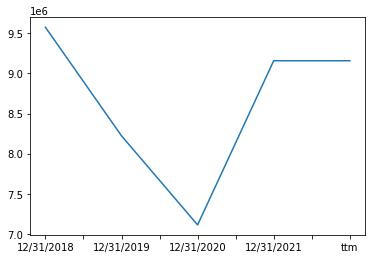

In [13]:
df_fin['Free Cash Flow'].plot()
plt.show()

## Statistics

In [14]:
from functions import statistics

In [15]:
stat_googl = statistics('GOOGL')

In [16]:
stat_googl.head()

,parameter,value
0,Market Cap (intraday),1.44T
1,Enterprise Value,1.33T
2,Trailing P/E,19.71
3,Forward P/E,19.19
4,PEG Ratio (5 yr expected),0.77


## Historical Data

In [17]:
from functions import hist_stock_price
from functions import plot_sp
from functions import relative_diff

In [18]:
ASML_sp = hist_stock_price('ASML.AS', 2021, 4, 25)

In [19]:
ASML_sp.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2021-04-26,554.900024,557.700012,550.000000,557.000000,550.144104,556857
1,2021-04-27,555.000000,559.400024,547.500000,552.700012,545.897034,698811
2,2021-04-28,552.700012,555.000000,548.099976,549.799988,543.032715,508201
3,2021-04-29,549.799988,557.099976,541.400024,542.799988,536.118896,699373
4,2021-04-30,542.599976,547.500000,538.900024,541.200012,534.538635,729987


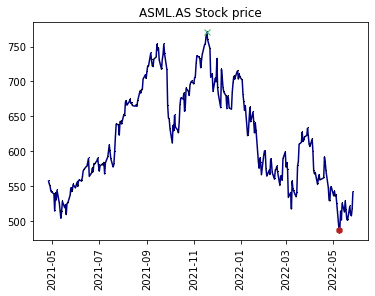

In [20]:
plot_sp('ASML.AS', 2021, 4, 25)

In [21]:
relative_diff(ASML_sp, 5)

Relative difference 5 months: -23.06% [compared to 2021-12-29]


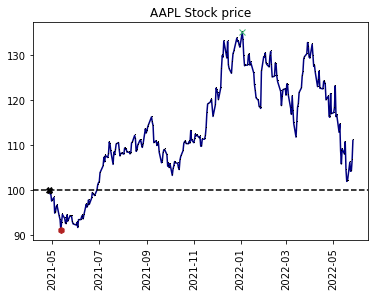

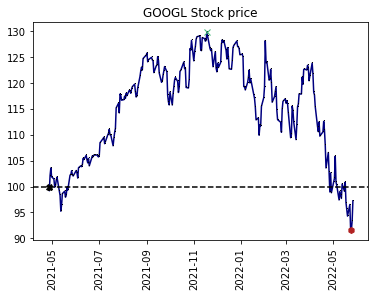

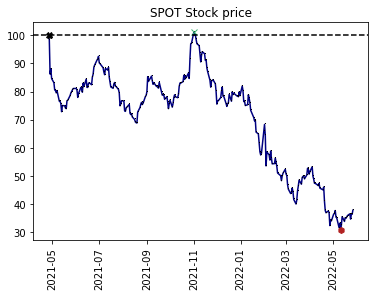

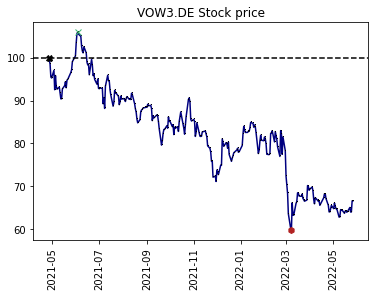

In [22]:
stocks = ["AAPL", "GOOGL", "SPOT", "VOW3.DE"]

for stock in stocks:
    plot_sp(stock, 2021, 4, 25, 'relative')

In [ ]:
#old code

In [ ]:
def plot_sp2(ticker):
    dataset = hist_stock_price(ticker)
    
    d = {}
    for i in range(len(dataset[dataset.Open == 0])):
        d["div_date_{0}".format(i)] = dataset.loc[dataset.Open == 0, 'Date'].iloc[i] #get the date of dividend
        d["div_date_index_{0}".format(i)] = dataset.loc[dataset.Open == 0].index[i] #get the index of the dividend line
        d["div_value_{0}".format(i)] = dataset.iloc[dataset.loc[dataset.Open == 0].index[i]-2, 5] #get the value at closing of the dividend day
    
    dataset = dataset.drop(dataset[dataset.Open == 0].index) #remove dividend line(s)
    
    #create plot
    plt.plot('Date', 'Close*', data = dataset)
    plt.grid()
    plt.title(str(ticker) + " Stock price")
    for i in range(int(len(d)/3)):
        #plt.annotate("Dividend", (d['div_date_{0}'.format(i)], d['div_value_{0}'.format(i)] + d['div_value_{0}'.format(i)]/40))
        plt.plot(d['div_date_{0}'.format(i)], d['div_value_{0}'.format(i)], '.', color='black')
    plt.xticks(rotation='90')
    plt.show()